In [23]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Employee Attrition dataset from kaggle competition
# Created by IBM data scientists for HR 
# Read the data set 

df = pd.read_csv("Employee-Attrition.csv", index_col = 0)
df.head(10)

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,,,,,,,,,,,,,,,,,,,,,
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2
32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,...,3,80,0,8,2,2,7,7,3,6
59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,...,1,80,3,12,3,2,1,0,0,0
30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,...,2,80,1,1,2,3,1,0,0,0
38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,...,2,80,0,10,2,3,9,7,1,8


## Exploratory Data Analysis

Lets begin by looking at the percentage of employee's who are considered attrited, and how many are not.

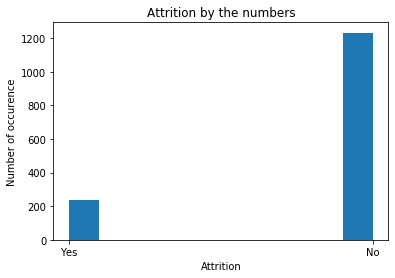

Yes:  237
No:  1233


In [47]:
plt.hist(df.Attrition)
plt.title('Attrition by the numbers')
plt.xlabel('Attrition')
plt.ylabel('Number of occurence')
plt.show();

# How many records 
print('Yes: ', df.loc[df['Attrition'] == 'Yes','Attrition'].count())
print('No: ', df.loc[df['Attrition'] == 'No','Attrition'].count())

### Attrition by hourly rate 

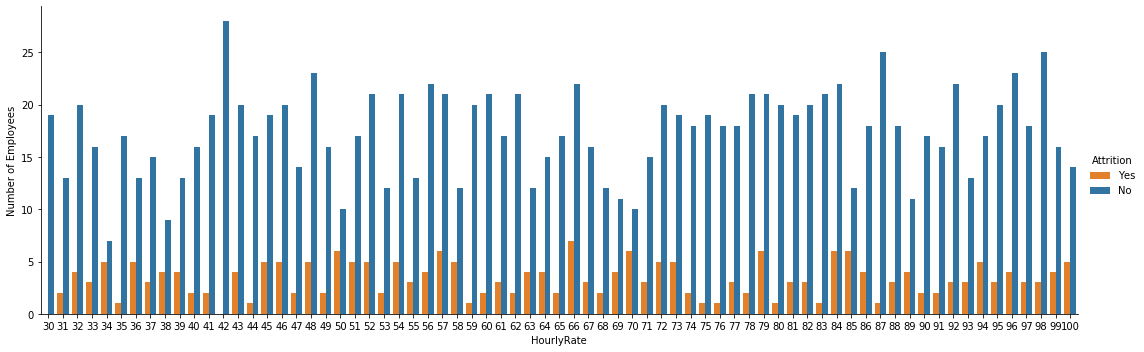

In [86]:
sns.axes_style('whitegrid')
sns.catplot('HourlyRate', data=df, aspect=3, kind='count', hue='Attrition', palette=['C1', 'C0']).set_ylabels('Number of Employees')

### Attrition by hourly rate 

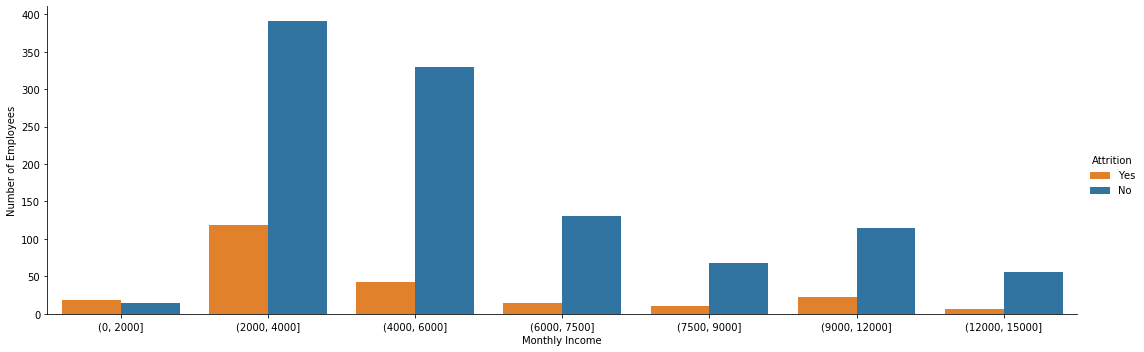

In [93]:
bins = [0, 2000, 4000, 6000, 7500, 9000, 12000, 15000]
df['Monthly Income'] = pd.cut(df['MonthlyIncome'], bins)

sns.axes_style('whitegrid')
sns.catplot('Monthly Income', data=df, aspect=3, kind='count', hue='Attrition', palette=['C1', 'C0']).set_ylabels('Number of Employees')

Attrition does not seem to be affected by pay since there is attrition across all pay scale, lets see the relationship between overtime and attrition

### Attrition vs Overtime

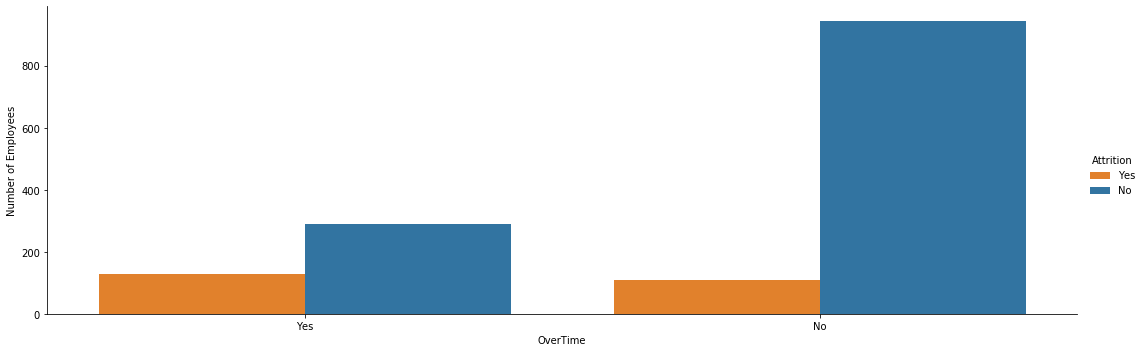

In [98]:
sns.axes_style('whitegrid')
sns.catplot('OverTime', data=df, aspect=3, kind='count', hue='Attrition', palette=['C1', 'C0']).set_ylabels('Number of Employees')